In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [317]:
train= pd.read_csv('titanic_train.csv')
sns.set_style('whitegrid')

In [359]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


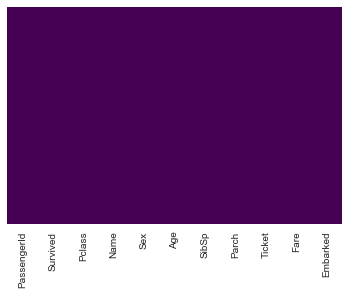

In [356]:
sns.heatmap(data=train.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [357]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


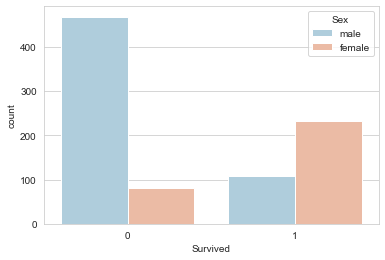

In [33]:
sns.countplot(x='Survived',data=train,palette='RdBu_r',hue='Sex')

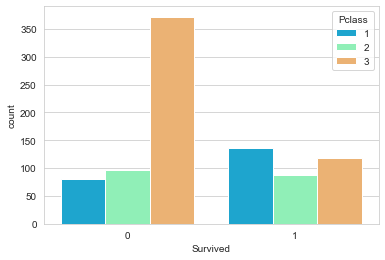

In [35]:
sns.countplot(x='Survived',data=train,palette='rainbow',hue='Pclass')

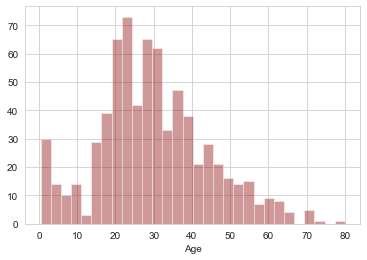

In [50]:
sns.distplot(a=train['Age'].dropna(),kde=False,bins=30,color='darkred')

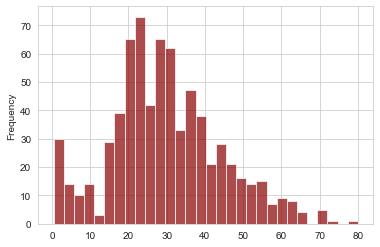

In [53]:
train['Age'].plot(kind='hist',bins=30,color='darkred',alpha=0.7)

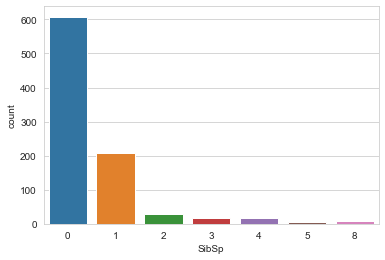

In [60]:
sns.countplot(x='SibSp',data=train)

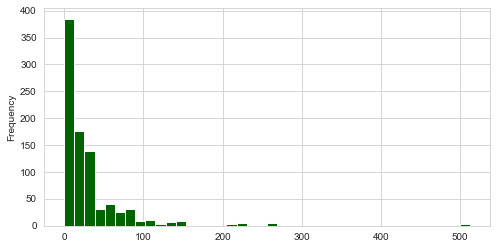

In [69]:
train['Fare'].plot(kind='hist',bins=40,color='darkgreen',figsize=(8,4))

In [43]:
train['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [70]:
import cufflinks as cf

In [73]:
cf.go_offline()

In [79]:
train['Fare'].iplot(kind='hist',bins=80,color='green')

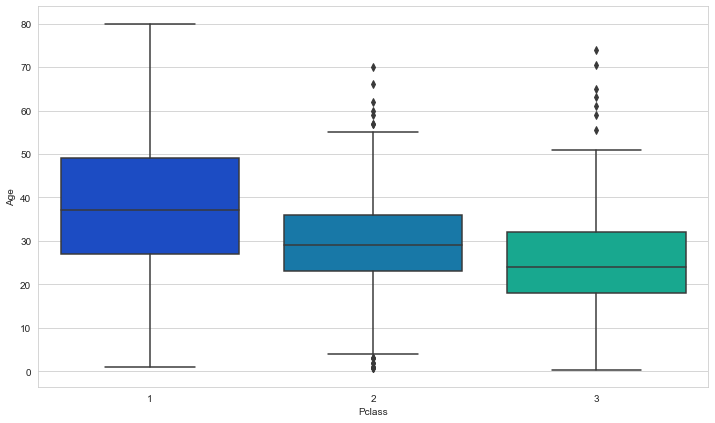

In [91]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train, palette='winter')

In [114]:
train['Age'][train['Pclass']==3].mean()

25.14061971830986

In [139]:
def impute_Age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return round(train['Age'][train['Pclass']==1].mean())
        elif Pclass==2:
            return round(train['Age'][train['Pclass']==2].mean())
        else:
            return round(train['Age'][train['Pclass']==3].mean())
    else:
        return Age

In [321]:
 train['Age']=train[['Age','Pclass']].apply(impute_Age,axis=1)

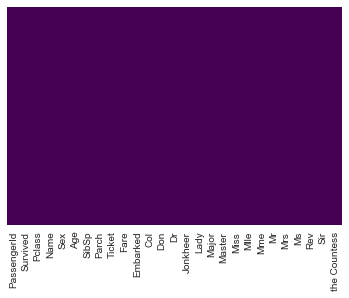

In [361]:
sns.heatmap(data=train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [118]:
pd.isnull(5)

False

In [133]:
round(4.51)

5

In [323]:
train.drop('Cabin',axis=1,inplace=True)

In [325]:
train.dropna(inplace=True)

In [175]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


In [167]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [174]:
train=pd.concat([train,embark,sex],axis=1)

In [362]:
train.drop(['Embarked','Name','Sex','Ticket','PassengerId'],axis=1,inplace=True)

In [363]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Col,Don,Dr,Jonkheer,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [190]:
from sklearn.model_selection import train_test_split

In [364]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [186]:
from sklearn.linear_model import LogisticRegression

In [366]:
logmodel=LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [215]:
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
print(a)

None


In [216]:
logmodel.coef_

array([[-0.78697786, -0.02618029, -0.21738246, -0.08754118,  0.00467766,
        -0.00247004, -0.17098723, -2.32243471]])

In [367]:
logmodel.coef_

array([[-0.80401399, -0.02259805, -0.44864851, -0.26975355,  0.005879  ,
         0.32894079, -0.53579901, -0.37697146, -0.51236848,  0.37444104,
        -0.16788839,  1.40595221,  1.19154434,  0.34165739,  0.        ,
        -1.45765043,  1.7284327 ,  0.38588919, -1.02331536,  0.35934912,
         0.19674849]])

In [368]:
predictions=logmodel.predict(X_test)

In [200]:
from sklearn.metrics import classification_report

In [369]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       163
           1       0.87      0.70      0.78       104

    accuracy                           0.84       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.84      0.84       267



In [298]:
a='sddad,Mr.sjsñfsdfds'

In [232]:
import re

In [328]:
re.split('; |,|\.',a)[1]

'Mr'

In [343]:
Mr=train['Name'].apply(lambda x:re.split(';|,|\.',x)[1][1:])

In [370]:
Mr

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 889, dtype: object

In [350]:
Class=pd.get_dummies(Mr,drop_first=True)

In [348]:
train[Mr=='Jonkheer']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S


In [360]:
train=pd.concat([train,Class],axis=1)

In [294]:
import re
text = 'The quick brown\nfox jumps*over the lazy dog.'
print(re.split('; |, |\*|\n',text))

['The quick brown', 'fox jumps', 'over the lazy dog.']


In [372]:
train=pd.concat([train,Mr],axis=1)

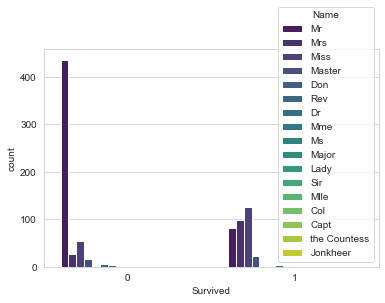

In [382]:
sns.countplot(x='Survived',data=train,hue='Name',palette='viridis')